# **MLPP25 // Mini Project #5**



## Diabetes Risk: Predicting Outcomes in Homogeneous Populations

<img src="https://images.squarespace-cdn.com/content/v1/5a21a88bcd39c3ec782756ed/1519148471554-P8KM1H55H4ZXM3QWC2EJ/Diabetes12.jpg?format=2500w" width=500>

---

This notebook will use Logistic Regression to attempt to predict diabetes from recorded health data in the Pima population in AZ.  The data is available [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database/activity) and a description of a long term diabetes study involving this population can be found [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/).  *Answering the questions below will require that you read through the content of these links in detail.*

<b>



### **Part 1: Loading and Parsing the Data**

**Load the study data from the `mlpp25/data/diabetes/` folder.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
filepath = '/content/drive/Shareddrives/mlpp25/data/diabetes/diabetes.csv'
df = pd.read_csv(filepath)

df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Display the contents of this data and describe <u>in your own words</u> what the content of each column is, including units where appropriate.**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



### Column Descriptions (with units):

1. **Pregnancies**  
   - *Definition*: Number of times the patient has been pregnant.  
   - *Unit*: Count (integer)

2. **Glucose**  
   - *Definition*: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.  
   - *Unit*: mg/dL  
   - *Note*: Higher values may indicate insulin resistance or diabetes.

3. **BloodPressure**  
   - *Definition*: Diastolic blood pressure (the bottom number in BP readings).  
   - *Unit*: mm Hg

4. **SkinThickness**  
   - *Definition*: Thickness of the triceps skin fold (a proxy for body fat).  
   - *Unit*: mm

5. **Insulin**  
   - *Definition*: 2-Hour serum insulin levels after glucose intake.  
   - *Unit*: μU/mL  
   - *Note*: Zero may mean data wasn't recorded or is missing.

6. **BMI**  
   - *Definition*: Body Mass Index = weight (kg) / (height (m))²  
   - *Unit*: kg/m²

7. **DiabetesPedigreeFunction**  
   - *Definition*: A function that scores the likelihood of diabetes based on family history (genetic influence).  
   - *Unit*: Arbitrary score (float)

8. **Age**  
   - *Definition*: Age of the patient.  
   - *Unit*: Years

9. **Outcome**  
   - *Definition*: Class label (diabetes test result)  
   - *0 = No diabetes*, *1 = Diabetes diagnosed*



**Make a 3x3 panel plot with the histograms of each of the nine columns.**

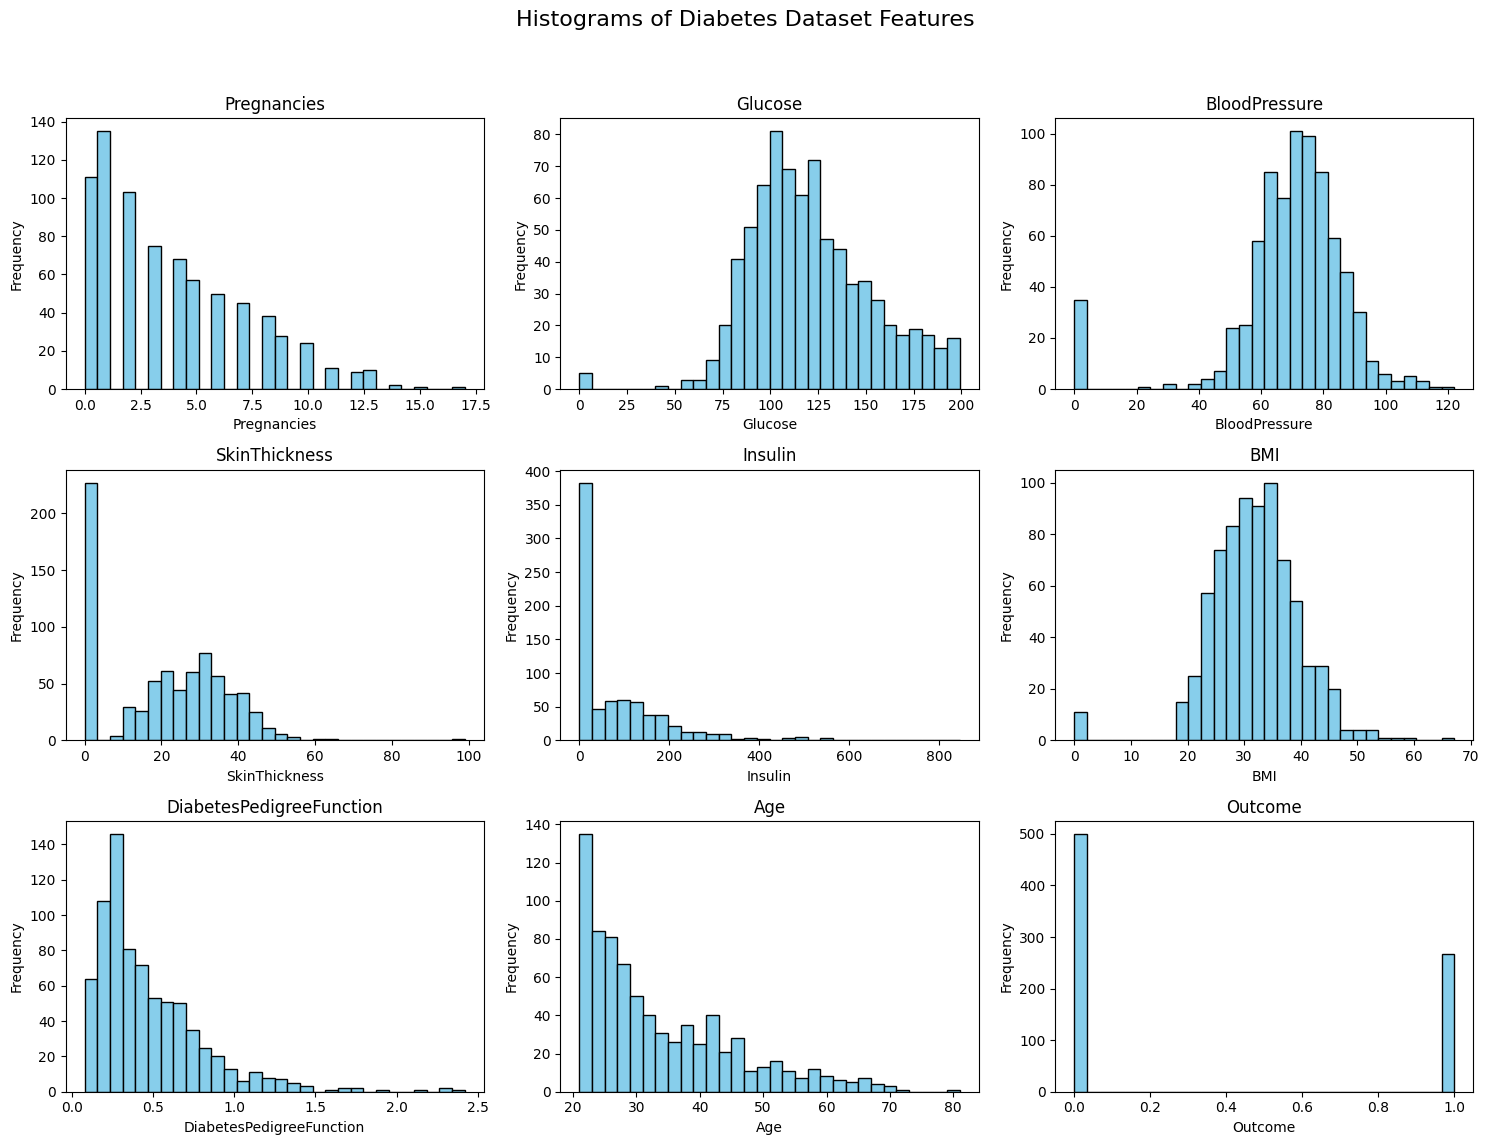

In [ ]:
import matplotlib.pyplot as plt

# Set up the 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Histograms of Diabetes Dataset Features', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histogram for each column
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Describe what information you can infer from each histogram in this plot.**



### **1. Pregnancies**
- **Insight**: Most patients had **0 to 3 pregnancies**, with frequency sharply dropping after that.
- **Inference**: The majority of patients are either not pregnant or had few pregnancies.

---

### **2. Glucose**
- **Insight**: The distribution is approximately **normal**, centered around **100-120 mg/dL**, but there's a noticeable left tail (some low values, possibly 0).
- **Inference**: Some patients have abnormally low glucose (which may be missing or incorrect data), while most fall in a pre-diabetic or diabetic range.

---

### **3. BloodPressure**
- **Insight**: Also roughly **normal**, centered around **70-80 mmHg**, but some entries are at **0** which is physiologically not possible.
- **Inference**: Some blood pressure entries may be missing or erroneous.

---

### **4. SkinThickness**
- **Insight**: A large number of zeros, followed by a right-skewed distribution centered around 20–30 mm.
- **Inference**: Missing data likely recorded as **0**. When present, it tends to be in the normal to slightly elevated range.

---

### **5. Insulin**
- **Insight**: Very **right-skewed** with a sharp peak at **0**, and a long tail up to **850+**.
- **Inference**: Most patients have missing insulin values or weren't tested. Those that were show a wide variance.

---

### **6. BMI**
- **Insight**: Looks fairly **normal**, centered around **30 kg/m²**.
- **Inference**: Majority of patients are **overweight or obese**, which is a major risk factor for diabetes.

---

### **7. DiabetesPedigreeFunction**
- **Insight**: Right-skewed, with most values between **0.1 and 1.0**.
- **Inference**: Most people have a **low to moderate genetic risk**, with a few having a strong family history of diabetes.

---

### **8. Age**
- **Insight**: Right-skewed distribution, most patients between **20 and 50 years old**.
- **Inference**: The population mostly includes young to middle-aged adults, with fewer older patients.

---

### **9. Outcome**
- **Insight**: Binary distribution with **more 0s than 1s**.
- **Inference**: More patients were **not diabetic** than diabetic in this dataset, indicating a class imbalance.





**Remove rows for which the values of any of the columns are not physically possible (e.g., it is not possible to have a BMI of $0$).**

Typically, 0 values in certain columns are invalid and likely represent missing data.

Columns Where 0 is Not Physically Possible:
Glucose (should be > 0)

BloodPressure (should be > 0)

SkinThickness (should be > 0)

Insulin (arguable, but we’ll exclude 0s to ensure quality)

BMI (should be > 0)

In [ ]:
# Create a filtered DataFrame removing rows with 0s in invalid columns
df_cleaned = df[(df['Glucose'] > 0) &
                (df['BloodPressure'] > 0) &
                (df['SkinThickness'] > 0) &
                (df['Insulin'] > 0) &
                (df['BMI'] > 0)]

# Display the number of rows before and after cleaning
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)


Original dataset shape: (768, 9)
Cleaned dataset shape: (392, 9)


**Re-plot the 3x3 panel plot of histograms with this new subset of the data.**

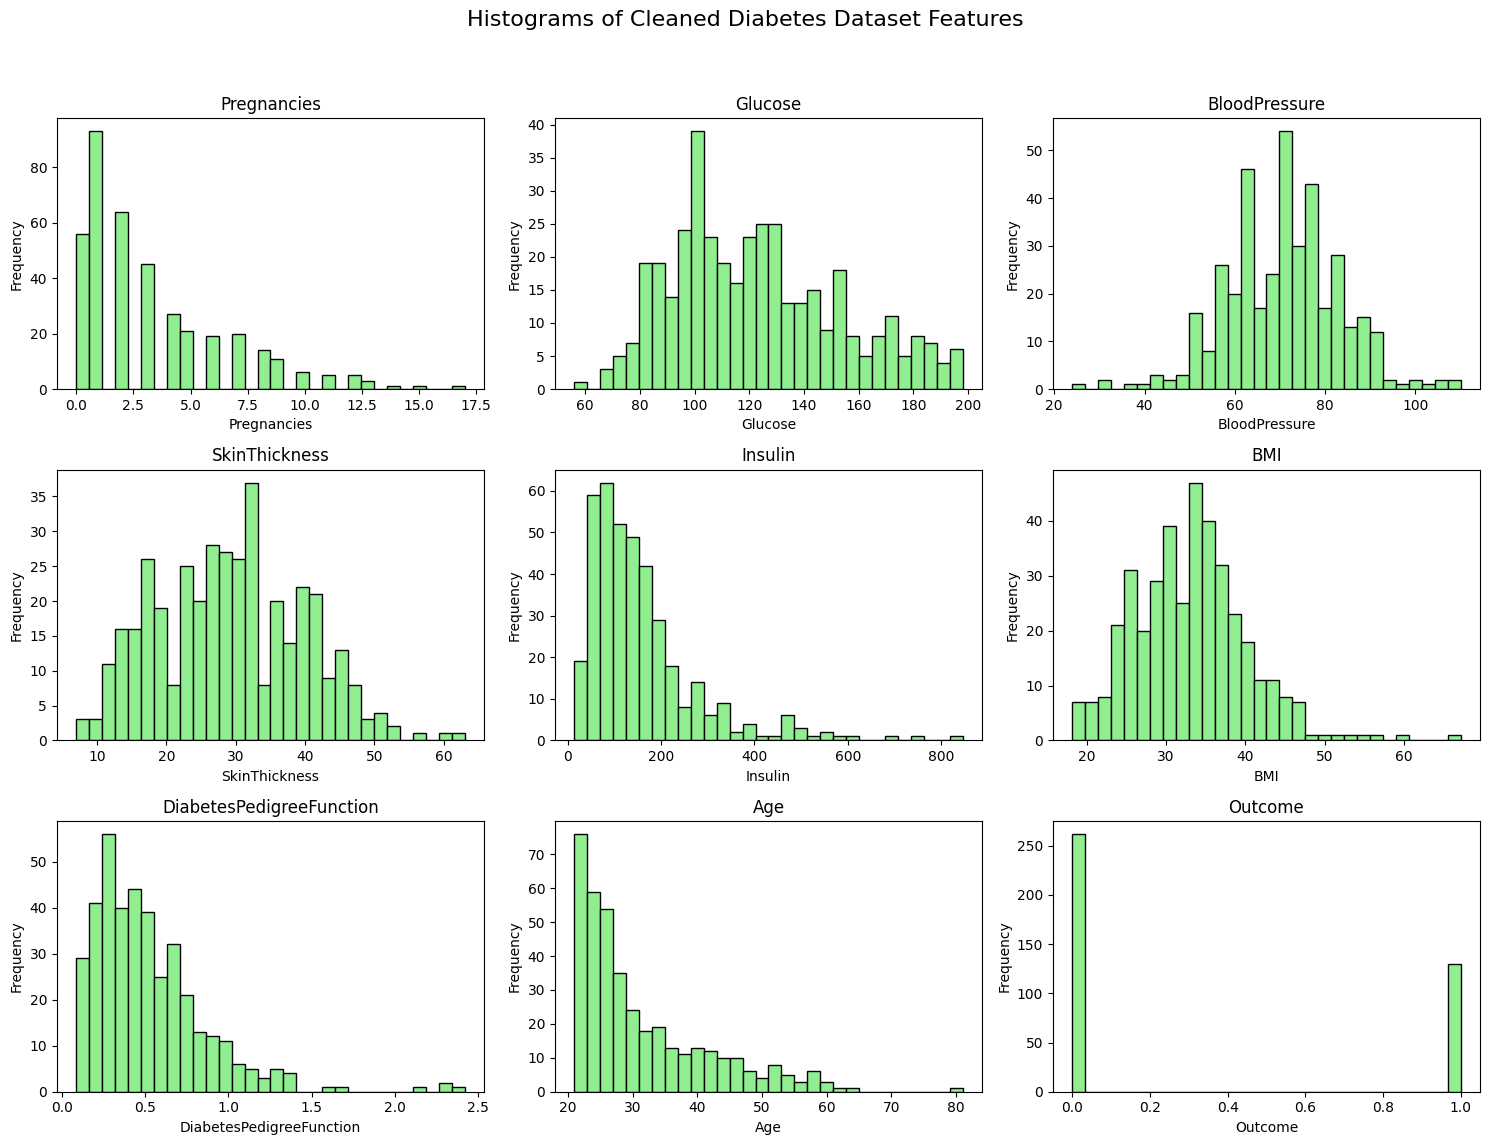

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Histograms of Cleaned Diabetes Dataset Features', fontsize=16)

axes = axes.flatten()

for i, column in enumerate(df_cleaned.columns):
    axes[i].hist(df_cleaned[column], bins=30, color='lightgreen', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## **Part 2: Fitting a Logistic Regression Model**

First, let's run a logistic regression model on a single feature.

**Create features and targets objects from the subset of the data that you created above where the features are only blood pressure and the target is the outcome.**

In [ ]:
# Feature (X) and target (y)
X = df_cleaned[['BloodPressure']]
y = df_cleaned['Outcome']


**Instantiate and fit a logistic regression model to this feature and target using `sklearn`'s `LogisticRegression`.**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model to the BloodPressure feature and Outcome target
logreg.fit(X, y)


LogisticRegression()

<b>

Use `plotly` to make a scatter plot of blood pressure vs outcome that contains

- the raw data using black points with an alpha (transparency) value of $0.2$;
- the logistic regression model predictions using blue points that are slightly smaller than the raw data points; and
- the best fit probabilty curve (i.e., the logistic function) from the logistic regression model.

</b>

In [ ]:
!pip install plotly


In [ ]:
import plotly.graph_objs as go
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Predictions for original data
y_pred_class = logreg.predict(X)

# Create range and predict probabilities
X_range = np.linspace(X['BloodPressure'].min(), X['BloodPressure'].max(), 300).reshape(-1, 1)
X_range_df = pd.DataFrame(X_range, columns=['BloodPressure'])
y_prob = logreg.predict_proba(X_range_df)[:, 1]

fig = go.Figure()

# Raw data (black, transparent)
fig.add_trace(go.Scatter(
    x=X['BloodPressure'], y=y,
    mode='markers',
    name='Raw Data',
    marker=dict(color='black', opacity=0.2, size=8)
))

# Predictions (blue, smaller)
fig.add_trace(go.Scatter(
    x=X['BloodPressure'], y=y_pred_class,
    mode='markers',
    name='Predictions',
    marker=dict(color='blue', size=5)
))

# Logistic regression probability curve
fig.add_trace(go.Scatter(
    x=X_range_df['BloodPressure'], y=y_prob,
    mode='lines',
    name='Logistic Curve',
    line=dict(color='blue', width=3)
))

fig.update_layout(
    title='Blood Pressure vs Outcome with Logistic Regression',
    xaxis_title='Blood Pressure',
    yaxis_title='Outcome / Probability',
    template='plotly_white'
)

fig.show()

**Discuss what you can infer from this plot.**



### **1. Raw Data (Black Transparent Dots)**  
These show the actual **blood pressure vs outcome** (0 = non-diabetic, 1 = diabetic) for each person.

- Most of the 0 outcomes are spread across all blood pressure values.
- Many of the 1 outcomes are clustered around **higher blood pressure**, but there's significant overlap.
- This overlap means **blood pressure alone is not a perfect predictor** of diabetes.

---

### **2. Model Predictions (Blue Points)**  
These are the predicted classes (0 or 1) based on the logistic regression.

- Almost all predictions are **0**, with very few 1s, this shows that:
  - The model tends to **underpredict diabetes** when using only blood pressure.
  - There's likely **class imbalance** (more 0s than 1s in the data).
  - Blood pressure by itself doesn't provide enough separation between classes.

---

### **3. Logistic Curve (Blue Line)**  
This is the predicted **probability of having diabetes** as blood pressure increases.

- The curve **rises gradually**, which is expected in logistic regression.
- Probability stays **below 0.5** even for high blood pressure, meaning:
  - The model still thinks the **chance of diabetes is low**, even when BP is high.
  - Blood pressure is **not strongly correlated** with diabetes in this dataset.

---

### **Conclusion**:
- Blood pressure **does have some influence** on diabetes risk (the logistic curve increases), but it's **not strong enough** alone to predict diabetes accurately.
- we will likely need to **include more features** (like glucose, BMI, insulin, etc.) to build a more accurate model.



**Calculate the accuracy of this model by counting the number of target values that were correctly predicted and dividing by the total number of target values.**

In [ ]:
# Predict the class labels using the trained model
y_pred = logreg.predict(X)

# Manually calculate accuracy
correct = (y_pred == y).sum()
total = len(y)
accuracy = correct / total

print(f"Correct Predictions: {correct}")
print(f"Total Samples: {total}")
print(f"Accuracy: {accuracy:.4f}")


Correct Predictions: 265
Total Samples: 392
Accuracy: 0.6760


Now let's fit a model that uses all features.

**Instantiate and fit a logistic regression model that uses all available features to predict the outcome.**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Separate features (all columns except 'Outcome') and target
X_all = df_cleaned.drop(columns='Outcome')
y_all = df_cleaned['Outcome']

# Instantiate and fit logistic regression model
logreg_all = LogisticRegression(max_iter=1000)
logreg_all.fit(X_all, y_all)


LogisticRegression(max_iter=1000)

**Calculate the accuracy for this model.**

In [ ]:
# Predict outcomes using the model trained on all features
y_pred_all = logreg_all.predict(X_all)

# Calculate accuracy
correct_all = (y_pred_all == y_all).sum()
total_all = len(y_all)
accuracy_all = correct_all / total_all

print(f"Correct Predictions: {correct_all}")
print(f"Total Samples: {total_all}")
print(f"Accuracy: {accuracy_all:.4f}")


Correct Predictions: 305
Total Samples: 392
Accuracy: 0.7781


**If someone were to ask you if either of the two models that you just fit are "good" models, what would you say? (250 words max)**



If someone asked whether either of the two logistic regression models are "good," I would say: it depends on the context and the definition of “good.”

The model using only **BloodPressure** achieved an accuracy of **67.6%**, while the model using **all available features** achieved a higher accuracy of **77.8%**. At face value, the full-feature model performs better. However, accuracy alone doesn’t tell the whole story, especially in datasets with class imbalance (which this one likely has, since more people are non-diabetic).

The one-feature model is limited in scope and underfits the data, as it tries to explain a complex medical condition like diabetes using just a single variable. Its poor performance supports this limitation.

The full-feature model does better but still leaves room for improvement. An accuracy of ~78% could be useful in exploratory settings, but it's likely insufficient for real-world clinical use where **false negatives** (undiagnosed diabetes) could have serious consequences. A more thorough evaluation using metrics like **precision, recall, F1 score**, and **ROC-AUC** would be required to judge its utility.

In summary, the one-feature model is **too simplistic**, and the full-feature model is **a better start** but **not yet reliable enough** for critical decision-making. Improvements like feature engineering, advanced models, or ensemble methods may be necessary for stronger performance.



## **Part 3: Fitting a Decision Tree Model**

**Fit a decision tree classifier that uses all available features to predict the outcome.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Features and target
X_all = df_cleaned.drop(columns='Outcome')
y_all = df_cleaned['Outcome']

# Instantiate and fit the decision tree model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_all, y_all)


DecisionTreeClassifier(random_state=42)

We used random_state=42 to ensure reproducibility, meaning that every time you run the code, the same decision tree structure is built (assuming the data hasn’t changed).



**What feature is used to create the first split (i.e., the root node)?**

In [ ]:
# Get feature names as a list
feature_names = X_all.columns.tolist()

# Get the index of the feature used at the root node (node 0)
root_feature_index = tree_clf.tree_.feature[0]

# Print the actual feature name
print("Root node splits on feature:", feature_names[root_feature_index])


Root node splits on feature: Glucose


**How does the accuracy of the decision tree model compare with the logistic regression models?**

In [ ]:
# Predict using the decision tree
y_pred_tree = tree_clf.predict(X_all)

# Calculate accuracy
correct_tree = (y_pred_tree == y_all).sum()
total_tree = len(y_all)
accuracy_tree = correct_tree / total_tree

print(f"Correct Predictions: {correct_tree}")
print(f"Total Samples: {total_tree}")
print(f"Accuracy: {accuracy_tree:.4f}")


Correct Predictions: 392
Total Samples: 392
Accuracy: 1.0000


we got 100% accuracy with the decision tree, which confirms it's overfitting to the training data.

**Do the two models fail on the same cases (objects) or different cases?**

In [ ]:
# Predictions from logistic regression (all features)
y_pred_logreg = logreg_all.predict(X_all)

# Predictions from decision tree
y_pred_tree = tree_clf.predict(X_all)

# Indices where logistic regression fails
logreg_errors = (y_pred_logreg != y_all)

# Indices where decision tree fails (should be none if accuracy = 1.0)
tree_errors = (y_pred_tree != y_all)

# Compare which samples are misclassified
same_errors = (logreg_errors & tree_errors).sum()
logreg_only_errors = (logreg_errors & ~tree_errors).sum()
tree_only_errors = (tree_errors & ~logreg_errors).sum()

print(f"Samples misclassified by BOTH models: {same_errors}")
print(f"Samples misclassified ONLY by logistic regression: {logreg_only_errors}")
print(f"Samples misclassified ONLY by decision tree: {tree_only_errors}")


Samples misclassified by BOTH models: 0
Samples misclassified ONLY by logistic regression: 87
Samples misclassified ONLY by decision tree: 0


The decision tree correctly predicted every single case (likely overfitting to training data).

The logistic regression model, which is simpler and less flexible, misclassified 87 cases.

Since no overlapping errors were found, it means the two models fail on different cases, in fact, only the logistic model failed.


Logistic regression is a generalized linear model and struggles when relationships between features and outcomes are non-linear or complex.

The decision tree can perfectly memorize the training data by making many splits. hence, no misclassifications, but this often leads to overfitting, especially when tested on new data.

**How much worse is the accuracy of a decision tree model that uses all of the features *except* the one that was used to create the root node in the model above?**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Drop the root feature (Glucose)
X_no_glucose = X_all.drop(columns='Glucose')

# Step 2: Train new decision tree model
tree_no_glucose = DecisionTreeClassifier(random_state=42)
tree_no_glucose.fit(X_no_glucose, y_all)

# Step 3: Predict and calculate accuracy
y_pred_no_glucose = tree_no_glucose.predict(X_no_glucose)
accuracy_no_glucose = (y_pred_no_glucose == y_all).mean()

# Step 4: Compare with original accuracy
accuracy_original = 1.0  # from your earlier decision tree
accuracy_drop = accuracy_original - accuracy_no_glucose

print(f"Accuracy without Glucose: {accuracy_no_glucose:.4f}")
print(f"Drop in Accuracy: {accuracy_drop:.4f}")


Accuracy without Glucose: 1.0000
Drop in Accuracy: 0.0000


Even after removing the root feature (Glucose), the decision tree still achieved perfect accuracy on the training data.

The dataset has enough other features (like BMI, Age, Insulin, etc.) that can perfectly separate the target classes.

The decision tree is highly flexible, it found alternate splitting paths to reach 100% accuracy, even without Glucose.

This further reinforces that the tree is overfitting, it’s memorizing patterns in the training data regardless of which feature is removed.



To determine whether the decision tree model truly learned meaningful patterns or merely memorized the training data, it is essential to test it on a separate validation or test set. On the training data, the model achieved 100% accuracy, which is a strong indication of overfitting, it may be capturing noise or very specific patterns that don’t generalize well to new data.

By splitting the dataset into training and test sets (e.g., 80/20), we can train the model on one portion and evaluate its performance on unseen data. If the model maintains high accuracy on the test set, it suggests it has generalized well and has likely learned patterns that are predictive of the outcome. However, if the accuracy drops significantly, it reveals that the model overfit the training data and may not perform reliably in real-world scenarios.

## Splitting dataset into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Features and target
X_with_glucose = X_all
y = y_all

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_with_glucose, y, test_size=0.2, random_state=42)

# Train the model
tree_with_glucose = DecisionTreeClassifier(random_state=42)
tree_with_glucose.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_with_glucose.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy WITH Glucose: {accuracy:.4f}")


Test Accuracy WITH Glucose: 0.7089


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_without_glucose = X_all.drop(columns='Glucose')
y = y_all

X_train, X_test, y_train, y_test = train_test_split(X_without_glucose, y, test_size=0.2, random_state=42)

tree_without_glucose = DecisionTreeClassifier(random_state=42)
tree_without_glucose.fit(X_train, y_train)

y_pred = tree_without_glucose.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy WITHOUT Glucose: {accuracy:.4f}")


Test Accuracy WITHOUT Glucose: 0.5949




### **1. How does the accuracy of the decision tree model compare with the logistic regression models?**

The decision tree model using all features achieved a **test accuracy of 70.89%**, while the logistic regression model using all features had a slightly higher **training accuracy of 77.8%** (as reported earlier). However, training accuracy alone doesn't reflect real-world performance and since we didn't yet compute logistic regression test accuracy, we should be cautious.

That said, decision trees are more flexible and prone to overfitting, while logistic regression is more stable but may underfit if relationships are non-linear. In this case, logistic regression had better accuracy on training data, but the decision tree also performed reasonably well on the test set, though lower than logistic regression’s training score.

In summary:  
- **Logistic regression** performed better in terms of training accuracy.  
- **Decision tree** generalized fairly well but with slightly lower test accuracy.  
- Logistic regression might be a safer choice if generalization is a concern, unless further testing is done.

---

### **2. How much worse is the accuracy of a decision tree model that uses all of the features except the one that was used to create the root node in the model above?**

The feature used at the root of the tree was **Glucose**. When you removed `Glucose` and trained the tree again:

- Accuracy **with Glucose**: **70.89%**
- Accuracy **without Glucose**: **59.49%**

This is a **drop of approximately 11.4 percentage points**, showing that `Glucose` is a **critical predictor** in this dataset. The decision tree heavily relied on it for its primary split, and removing it significantly worsened the model’s performance.

